In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import csv
from matplotlib.patches import Ellipse
import pandas as pd
from numpy import cov
import matplotlib.patches as mpatches
import matplotlib.colors as pltc
from numpy.linalg import eig

In [2]:
# Read input data
inputData = pd.read_csv("Dataset 1.txt", sep='\t', lineterminator='\n', header=None)

In [3]:
# Divide data and ground truth clusters
data = np.array(inputData[inputData.columns[2:]])
groundTruthClusters = np.array(inputData[inputData.columns[1:2]])

In [4]:
numberOfClusters = 5

In [5]:
def kmeansConverge(data,numberOfClusters):
    # Initialize random cluster centroids
    pts = np.array(data)
    centroids = pts[np.random.choice(pts.shape[0], numberOfClusters, replace=False), :]
    
    # Loop until the values of the previous iteration doesn't match values of current iteration
    while(True):
        # Compute distance 
        distance = np.linalg.norm(centroids - pts[:,None], axis=-1)
        
        # Classify points closest to the centroid
        clusterList = np.argmin(distance,axis=1)
        
        # Compute next centroids 
        nextCentroids = np.zeros((numberOfClusters,len(pts[0])))
        for i in range(numberOfClusters):
            nextCentroids[i] = np.mean(pts[clusterList.ravel()==i],axis=0)
        
        # Convergence step 
        # If updated centers are equal to previous centers, return 
        if(np.array_equal(centroids,nextCentroids)):
             return clusterList,nextCentroids
        else:
            centroids = nextCentroids
            
    return clusterList,centroids

In [6]:
# Call the kmeans function and compute the clusters
clusterList, centroids = kmeansConverge(data,numberOfClusters)

In [7]:
# Scale the data
scaledData=(data - data.mean(0))
# Compute co-varaince matric
covarianceMatrix = cov(scaledData.T)
# Perform Eigen Decomposition
eigenValues, eigenVectors = eig(covarianceMatrix)
# Compute dot product
eigenVectorProduct = eigenVectors.T.dot(scaledData.T).T

In [8]:
def plotGraph(eigenVectorProduct,clusterList,centroids):
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    colors=['red','green','blue','purple','black','orange','pink','magenta','brown','yellow']
    setOfLabels = [l[0] for l in groundTruthClusters]
    for i in range(len(centroids)):
        x,y = eigenVectorProduct[clusterList.ravel()==i][:, 0].flatten(), eigenVectorProduct[clusterList.ravel()==i][:, 1].flatten()
        plt.scatter(x,y, marker= 'o' ,c=colors[i])
    
    labelList = []
    for i in list(set(clusterList)):
            labelList.append(mpatches.Patch(color = colors[i],label = str(i)))
    plt.legend(handles=labelList)
    plt.title("Dataset 1")
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()

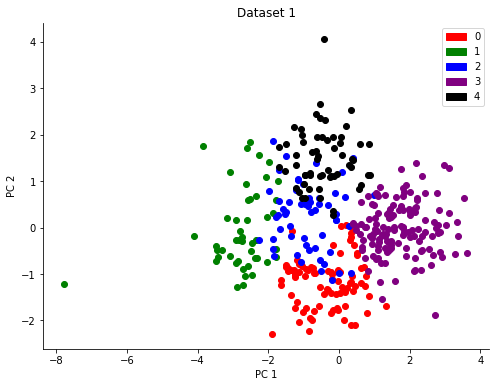

In [9]:
plotGraph(eigenVectorProduct,clusterList,centroids)

In [10]:
#######################################################################
# Function to compute Jaccard coefficient and Rand index
#######################################################################
def metric(data,groundTruthClusters,output):
    m11=0
    m10=0
    m01=0
    m00=0
    
    for i in range(0,len(data)):
        for j in range(1,len(data)):
            if((groundTruthClusters)[i] == (groundTruthClusters)[j] and output[i] == output[j]):
                m11=m11+1
            elif((groundTruthClusters)[i] == (groundTruthClusters)[j] and not (output[i] == output[j])):
                m10=m10+1
            elif(not((groundTruthClusters)[i] == (groundTruthClusters)[j]) and output[i] == output[j]):
                m01=m01+1
            elif(not((groundTruthClusters)[i] == (groundTruthClusters)[j]) and not(output[i] == output[j])):
                m00=m00+1

    jacard_coeff=float(m11)/float((m11+m01+m10))
    print("Jaccard Coefficient: ", jacard_coeff)
    rand_index=float((m11+m00))/float((m11+m00+m10+m01))
    print("Rand Index: ", rand_index)


In [11]:
# Compute Jaccard coefficient and Rand index
metric(data,groundTruthClusters,np.asarray(clusterList))

Jaccard Coefficient:  0.39246426850810984
Rand Index:  0.7963461409057264
